# Extraction de Keywords

## Imports

In [33]:
import os
import yake

from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import numpy as np

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from wordcloud import WordCloud
from IPython.display import Image

[nltk_data] Downloading package stopwords to /home/pav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Préparation

In [2]:
year_selected = 1969

In [3]:
# Lister les fichiers de l'année selectionnée
data_path = "../../data/txt/"

files = [f for f in os.listdir(data_path) if f.endswith('.txt') and f.split('_')[2].split('-')[0] == str(year_selected)]

# Imprimer le nombre de fichiers identifiés
print(len(files))

100


In [4]:
# Quelques stats

count_year = defaultdict(int)
count_month = defaultdict(int)

for f in files:
    elems = f.split("_")
    year = elems[2].split("-")[0]
    month = elems[2].split("-")[1]
    day = elems[2].split("-")[2]
    count_year[year] += 1
    count_month[month] += 1
print(f"Il y a {count_year[str(year_selected)]} fichiers distribués sur {len(count_month)} mois pour l'année choisie")

Il y a 100 fichiers distribués sur 12 mois pour l'année choisie


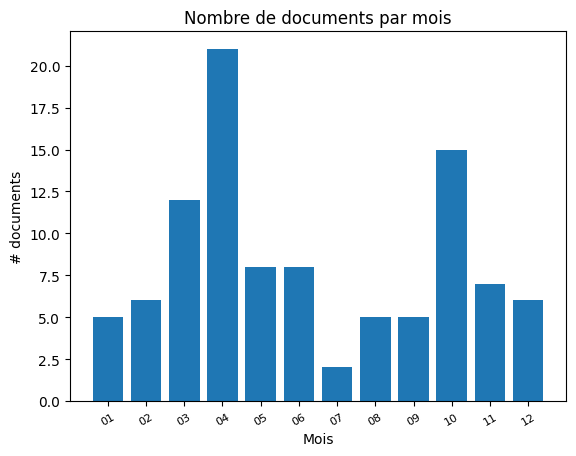

In [5]:
count_month_sorted = dict(sorted(count_month.items(), key=lambda x: int(x[0])))

index = np.arange(len(count_month_sorted))
plt.bar(index, count_month_sorted.values())
plt.xlabel('Mois')
plt.ylabel('# documents')
plt.xticks(index, count_month_sorted.keys(), fontsize=8, rotation=30)
plt.title('Nombre de documents par mois')
plt.show()

## Création d'un fichier contenant le texte de tous les journaux de l'année choisie

In [6]:
contents = []
for f in files:
    with open(os.path.join(data_path, f), 'r', encoding='utf-8') as f:
        lines = f.readlines()
        contents.extend(lines)   # add all lines to contents
        #contents.append(f.read())  

In [7]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year_selected}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(contents))

# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year_selected}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"4 tîîtt : MERCREDI 2 AVRIL 1969 LE SOIR » 21 INTERNATIONAL COMPANY - BRUSSELS 15 has vacàncy for TW0 MALE EMPLOYEES for its commercial services. aged 20 to 35. — Perfect command of ENGLISH and fluency in FRENCH essential; caii 71.01.90 ext. 31 for first contact. 167433 H » *4 ♦♦ ♦♦ 44 44 tt ♦♦ îî *♦ ♦♦ 44 44 4* ' 44 44 44 44 44 44 S.A. ISBECQUE TODD 25-27/ bld. Emile Bockstael, Bruxelles 2 engage , DACTYLOS expérimentées bilingues ayant si possible bonnes notions d'anglais. Semaine de 5 jours. O"

### Nettoyage du fichier

In [78]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem"]

add_sw = ["Brux", "ecrire","écr", "ecr","brux", "BRUX", "Là","Av", "AV",
       "vend", "prix", "rue", "bon", "Ch", "CH", "ST", "Chff",
       "Tél", "tél", "très", "ans", "PL", "pl", "St",
       "téléph","gar","app", "trav", "ch", "CH", "Ch","pr", "Si", "si", "SI"]
sw.extend(add_sw)
sw = set(sw)

In [73]:
# Création d'une fonction de nettoyage
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year_selected}.txt"
        output_path = f"{year_selected}_clean.txt"
    else:
        input_path = f"{folder}/{year_selected}.txt"
        output_path = f"{folder}/{year_selected}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        for line in f:
            words = nltk.wordpunct_tokenize(line)
            kept = [w.upper() for w in words if len(w) > 1 and w.isalpha() and w.lower() not in sw]
            kept_string = " ".join(kept)
            output.write(kept_string + '\n')
    return f'Output has been written in {output_path}!'

# Nettoyage du fichier
clean_text(year_selected, folder=temp_path)

'Output has been written in ../data/tmp/1969_clean.txt!'

In [10]:
# Vérifier le résultat
integrated_file=f'{year_selected}.txt'
cleaned_file=f'{year_selected}_clean.txt'

with open(os.path.join(temp_path, cleaned_file), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'TÎÎTT MERCREDI AVRIL SOIR INTERNATIONAL COMPANY BRUSSELS HAS VACÀNCY FOR MALE EMPLOYEES FOR ITS COMMERCIAL SERVICES AGED TO PERFECT COMMAND OF ENGLISH AND FLUENCY IN FRENCH ESSENTIAL CAII EXT FOR FIRST CONTACT TT ÎÎ ISBECQUE TODD BLD EMILE BOCKSTAEL BRUXELLES ENGAGE DACTYLOS EXPÉRIMENTÉES BILINGUES SI POSSIBLE BONNES NOTIONS ANGLAIS SEMAINE JOURS OFFRE MANUSCRITE RÉFÉRENCES PRÉTENTIONS COMINIERE RECHERCHE BUREAU ÉTUDEE INGENIEUR TECHNICIEN ELECTRO MECANICIEN AL EXPÉRIMENTÉ CONNAISSANCES EH CONST'

### Analyse de vocabulaire du contenu des articles de l'année choise

In [11]:
# Récupération du contenu des 2 fichiers (avant et après nettoyage)
text = []
text_cleaned = []

with open(os.path.join(temp_path, integrated_file), 'r', encoding='utf-8') as f:
    text = f.read()

with open(os.path.join(temp_path, cleaned_file), 'r', encoding='utf-8') as f:
    text_cleaned = f.read()

In [12]:
# Tokenization in file before cleaning
words = nltk.wordpunct_tokenize(text)
voc = set(words)
print(f"{len(words)} words found in file before cleaning ({len(voc)} different word forms)")

# Tokenization in cleaned file
words_cleaned = nltk.wordpunct_tokenize(text_cleaned)
voc = set(words_cleaned)
print(f"{len(words_cleaned)} words found in cleaned file ({len(voc)} different word forms)")

799307 words found in file before cleaning (77990 different word forms)
252224 words found in cleaned file (52227 different word forms)


In [13]:
words[:20]

['4',
 'tîîtt',
 ':',
 'MERCREDI',
 '2',
 'AVRIL',
 '1969',
 'LE',
 'SOIR',
 '»',
 '21',
 'INTERNATIONAL',
 'COMPANY',
 '-',
 'BRUSSELS',
 '15',
 'has',
 'vacàncy',
 'for',
 'TW0']

In [14]:
words_cleaned[:20]

['TÎÎTT',
 'MERCREDI',
 'AVRIL',
 'SOIR',
 'INTERNATIONAL',
 'COMPANY',
 'BRUSSELS',
 'HAS',
 'VACÀNCY',
 'FOR',
 'MALE',
 'EMPLOYEES',
 'FOR',
 'ITS',
 'COMMERCIAL',
 'SERVICES',
 'AGED',
 'TO',
 'PERFECT',
 'COMMAND']

In [15]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

231232 words kept (51335 different word forms)


In [16]:
# Récupération des mots les plus fréquents
fdist = nltk.FreqDist(kept)
fdist.most_common(30)

[('bruxelles', 1395),
 ('app', 914),
 ('brux', 677),
 ('gar', 582),
 ('heures', 486),
 ('prés', 466),
 ('cuis', 465),
 ('demande', 413),
 ('part', 399),
 ('soir', 395),
 ('terr', 392),
 ('villa', 385),
 ('agence', 375),
 ('service', 364),
 ('place', 362),
 ('grand', 337),
 ('liv', 335),
 ('saint', 329),
 ('chb', 319),
 ('centre', 315),
 ('avenue', 309),
 ('téléph', 298),
 ('engage', 288),
 ('bur', 286),
 ('bilingue', 284),
 ('jours', 281),
 ('trav', 280),
 ('libre', 266),
 ('mod', 266),
 ('monsieur', 263)]

In [17]:
fdist.hapaxes()[:30]

['tîîtt',
 'vacàncy',
 'aged',
 'command',
 'caii',
 'isbecque',
 'todd',
 'étudee',
 'appqpe',
 'tnnttîi',
 'imnwmmwrïîr',
 'immediâtely',
 'thetr',
 'selected',
 'americana',
 'neessens',
 'floor',
 'ltnthout',
 'îîîtjîîîîîtîînnîîîiîînmnîîîîîîîîîîîîîuutîîîîttîîîîîîîîîîîmî',
 'precisant',
 'txtxixxxtxtxxtxxxxxxxxixi',
 'ittît',
 'iittixxxxxxxxxxxxxxxxxxnxrixxxxxrxx',
 'comptableou',
 'jast',
 'orthogr',
 'bjureau',
 'vnamique',
 'bradstreet',
 'progres']

In [18]:
# Identification des mots les plus longs
n = 30
sorted(voc, key=len, reverse=True)[:n]

['pillllllllllllllllllllllllllllllllllllllilllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllh',
 'illillilllllllilllllllllllillllllillllllllllllliiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiis',
 'ahilhiiiiiiiiiiiiiiiiiiiiiiihiiiiiiiiiiiiiiiiiiiiiiiiiiiisiiiiiiiiiiiiiiiiiiiiiiiihiiiiiilië',
 'nhiiiiniihiiiiiuiiimiiiiiiiiiiiiiiiiiiiimiiiiiniiimiiiiimiiiiiiiiiiiiiiiiiiiiiiiü',
 'iiiilliiiiiitiiiiiiiiiiiiiiiiiiiiiiniiiuiiiiiiiiiiiiiiuiimiuiiiuiiiiniinnmmuiiîi',
 'iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii',
 'iinrnmmiiiimiiiiimiiiiiiiimiiiiinbiiiiinihiiwiiiiiiiiiiiiiiiiiiimiiiiir',
 'nîîîîîtîîîtîîîîîîîîîîîîîîîîîîîîîîîîîîîîîîîîîîîîîîîîîîîîntttîttîîîîîîut',
 'imiiiiiiiiiiiiiiiimiimiimimiimiiiimiiimiiiiiiiiiimiiiiiiiiiimiiiiimmi',
 'iciiiiiiiiiiiiiiiiiiiiiiiiiiiimiiiiiiiiiiiiihiiiiiiiiiiiimii',
 'mtttttttttttîttttttîttttttttttttttttttttmttttttmtmtmmtîtttüi',
 'illiiiiiiiiiiiririhrihililillllillilllllllfimillllillliiibiu',
 'riaiiiiiiiiii

## Extraire les mots clés de tous les articles d'une année choisie avec Yake

https://github.com/LIAAD/yake

In [19]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

## Faire la même opération sur tous les documents

In [20]:
# Find keywords per file linked to the specific year keeping bigrams
for f in sorted(files):
    text = open(os.path.join(data_path, f), 'r', encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB838_1969-01-04_01-00014.txt mentions these keywords: Fds Rtes, TITRES COURS, PRECOMPTE SNCB, Rand Mines, act. act, PRECOMPTE Anvers, COURS COURS, PRECOMPTE Gand, Bruxelles VENDREDI, lots Lots, JANVIER Marché, Gand Liège, PRECOMPTE DEDUIT...
KB_JB838_1969-01-05_01-00012.txt mentions these keywords: satisfaction Victorieuse, LESblR fîDIMANCH, résultats inespérés, prévu Bremerhaven, l'équipe féminine, Gantoise Braem, Grand prix, Attelé Jos...
KB_JB838_1969-01-11_01-00010.txt mentions these keywords: DIVISION III, Racing White, Soft SAMEDI, samedi soir, Léo Proost, Van Laneker, Léopold Club...
KB_JB838_1969-01-15_01-00017.txt mentions these keywords: janvier Messieurs, RENTE VIAGERE, OFFICE PROPRIETAIRES, WATERLOO Villa, VENTE PUBLIQUE...
KB_JB838_1969-01-22_01-00015.txt mentions these keywords: Volkswagen qu’on, seulement parce, c’est précisément, gamme Volkswagen, Solide dose, MONDE IMPORTATEUR, MEILLEURS ANCIENS, ANCIENS ETABLISSEMENTS, ETABLISSEMENTS AGENTS, BELGIQUE DTETEREN, DTE

In [21]:
# Find keywords per file linked to the specific year keeping bigrams
for f in sorted(files):
    text = open(os.path.join(data_path, f), 'r', encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) >= 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB838_1969-01-04_01-00014.txt mentions these keywords: Fds Rtes, PRECOMPTE SNCB Suisse, lots Lots Lots, TITRES COURS, PRECOMPTE SNCB, Rand Mines, TITRES COURS COURS, Rand Mines Rand, act. act, PRECOMPTE Anvers, Gand Liège Ext, COURS COURS, PRECOMPTE Gand, Bruxelles VENDREDI, lots Lots, IOOIO IOOIO Liège, JANVIER Marché, Gand Liège, PRECOMPTE DEDUIT, Gand Docks Gand...
KB_JB838_1969-01-05_01-00012.txt mentions these keywords: inespérés à Bremmer, satisfaction Victorieuse, l'équipe féminine belge, LESblR fîDIMANCH, motifs de satisfaction, obtenu des résultats, résultats inespérés, prévu Bremerhaven, Andrée Van Vlasselaér, Attelé Jos Reubens, l'équipe féminine, Gantoise Braem, Grand prix, Attelé Jos...
KB_JB838_1969-01-11_01-00010.txt mentions these keywords: DIVISION III, Racing White, Soft SAMEDI, samedi soir, DIVISION III Sporting, Robert Van Laneker, clubs vie prix, Léo Proost, Van Laneker, Léopold Club, champion de Belgique...
KB_JB838_1969-01-15_01-00017.txt mentions these keywor

In [22]:
# Find keywords from the integrated file linked to the specific year
text = open(os.path.join(temp_path, integrated_file), 'r', encoding="utf-8").read()
keywords_int = kw_extractor.extract_keywords(text)
print(text[:500])
print(keywords_int)

4 tîîtt : MERCREDI 2 AVRIL 1969 LE SOIR » 21 INTERNATIONAL COMPANY - BRUSSELS 15 has vacàncy for TW0 MALE EMPLOYEES for its commercial services. aged 20 to 35. — Perfect command of ENGLISH and fluency in FRENCH essential; caii 71.01.90 ext. 31 for first contact. 167433 H » *4 ♦♦ ♦♦ 44 44 tt ♦♦ îî *♦ ♦♦ 44 44 4* ' 44 44 44 44 44 44 S.A. ISBECQUE TODD 25-27/ bld. Emile Bockstael, Bruxelles 2 engage , DACTYLOS expérimentées bilingues ayant si possible bonnes notions d'anglais. Semaine de 5 jours. O
[('Ecrire Agence Rossel', 5.436886534021055e-06), ('Tél', 8.313187600061636e-06), ('Bruxelles', 9.994563719857121e-06), ('DEM', 3.0877108627503113e-05), ('Agence Rossel', 3.1665143393276754e-05), ('rue', 3.43521860039891e-05), ('Liège Liège Liège', 3.538450882232299e-05), ('ROSSEL', 3.8851989122389596e-05), ('Brux', 4.237264758693377e-05), ('BRUXELLES Tél', 4.971219172169105e-05), ('Van', 5.6441557786502734e-05), ('app', 5.881090071552097e-05), ('BRUXELLES cherche JEUNE', 5.9219259053116886e-05

In [23]:
# Find keywords from the cleaned file linked to the specific year
text = open(os.path.join(temp_path, cleaned_file), 'r', encoding="utf-8").read()
keywords_cleaned = kw_extractor.extract_keywords(text)
print(text[:500])
print(keywords_cleaned)

TÎÎTT MERCREDI AVRIL SOIR INTERNATIONAL COMPANY BRUSSELS HAS VACÀNCY FOR MALE EMPLOYEES FOR ITS COMMERCIAL SERVICES AGED TO PERFECT COMMAND OF ENGLISH AND FLUENCY IN FRENCH ESSENTIAL CAII EXT FOR FIRST CONTACT TT ÎÎ ISBECQUE TODD BLD EMILE BOCKSTAEL BRUXELLES ENGAGE DACTYLOS EXPÉRIMENTÉES BILINGUES SI POSSIBLE BONNES NOTIONS ANGLAIS SEMAINE JOURS OFFRE MANUSCRITE RÉFÉRENCES PRÉTENTIONS COMINIERE RECHERCHE BUREAU ÉTUDEE INGENIEUR TECHNICIEN ELECTRO MECANICIEN AL EXPÉRIMENTÉ CONNAISSANCES EH CONST
[('LIEU PART BRUXELLES', 6.679462786485206e-07), ('AVENUE LOUISE BRUXELLES', 7.108284048426759e-07), ('TIENT LIEU PART', 8.996495517421447e-07), ('APP MOD CHB', 9.333171490588825e-07), ('BRUXELLES OCTOBRE SERVICE', 1.1951945235129233e-06), ('ENFANTS MONSIEUR MADAME', 1.2394748910277e-06), ('APP CHB GAR', 1.4497974844573155e-06), ('LIV CUIS SDB', 1.471836892387424e-06), ('CURRICULUM VITAE AGENCE', 1.506093078067311e-06), ('LIV CHB CUIS', 1.510839091224046e-06), ('PART BRUXELLES AVENUE', 1.576541

In [24]:
# Garder les bigrammes du fichier intégré
kept = []
for kw, score in keywords_int:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
print(f"{integrated_file} mentions these keywords:")
for n in kept:
    print(n)

1969.txt mentions these keywords:
Agence Rossel
BRUXELLES Tél
L’AGENCE ROSSEL
Bruxelles dem
BRUXELLES demande
Bruxelles ENGAGE
Bar dem
dames dem
Bruxelles Centre
Ecrire Agence
bel app
Bruxelles Bruxelles
Faire offre
rue Royale


In [40]:
# Garder les bigrammes du fichier intégré
kept = []
for kw, score in keywords_cleaned:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
print(f"{cleaned_file} mentions these keywords:")
for n in kept:
    print(n)

1969_clean.txt mentions these keywords:
APP MOD


# Nuage de mots

In [79]:
# Vérifier le résultat
with open(os.path.join(temp_path, cleaned_file), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'TÎÎTT MERCREDI AVRIL SOIR INTERNATIONAL COMPANY BRUSSELS HAS VACÀNCY FOR MALE EMPLOYEES FOR ITS COMMERCIAL SERVICES AGED TO PERFECT COMMAND OF ENGLISH AND FLUENCY IN FRENCH ESSENTIAL CAII EXT FOR FIRST CONTACT TT ÎÎ ISBECQUE TODD BLD EMILE BOCKSTAEL BRUXELLES ENGAGE DACTYLOS EXPÉRIMENTÉES BILINGUES POSSIBLE BONNES NOTIONS ANGLAIS SEMAINE JOURS OFFRE MANUSCRITE RÉFÉRENCES PRÉTENTIONS COMINIERE RECHERCHE BUREAU ÉTUDEE INGENIEUR TECHNICIEN ELECTRO MECANICIEN AL EXPÉRIMENTÉ CONNAISSANCES EH CONSTRUC'

In [80]:
# Affichage des termes les plus fréquents
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('BRUXELLES', 1395), ('AV', 1130), ('BRUX', 677), ('AG', 551), ('ST', 500), ('ÉT', 490), ('HEURES', 486), ('TT', 479), ('PRÉS', 466), ('CUIS', 465)]


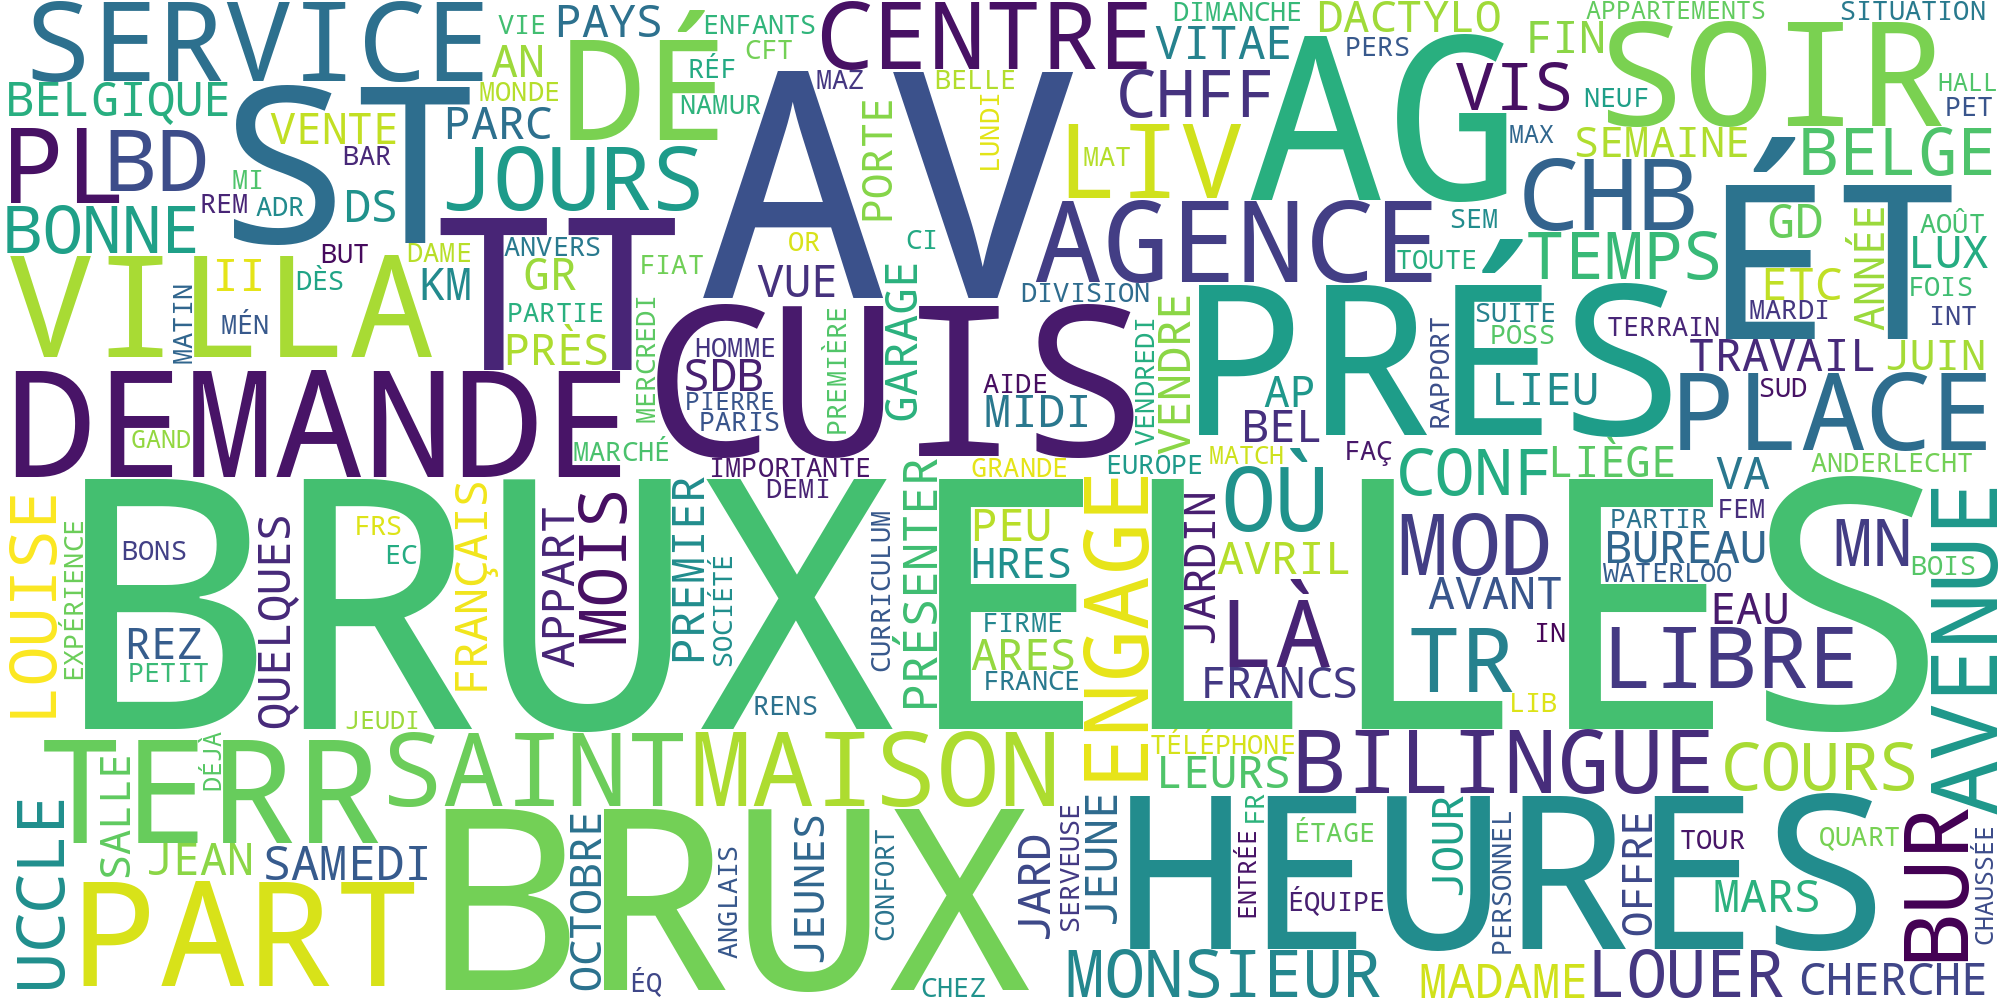

In [81]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year_selected}.png"))
Image(filename=os.path.join(temp_path, f"{year_selected}.png"))

# Reconnaissance d'entités nommées avec Spacy

In [86]:
import spacy
from spacy.lang.fr.examples import sentences
!python -m spacy download fr_core_news_md-3.8.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 MB 21.6 MB/s  0:00:02m0:00:0100:01
  Preparing metadata (setup.py) ... done

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_md')


In [83]:
nlp = spacy.load('fr_core_news_md')

In [89]:
# Charger le texte
n=1000000
with open(os.path.join(temp_path, integrated_file), 'r', encoding='utf-8') as f:
    text = f.read()[:n]

In [90]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: user 1min 21s, sys: 14.2 s, total: 1min 36s
Wall time: 1min 36s


In [91]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1

In [92]:
# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")

Rossel apparait 107 fois dans le corpus
- Tél apparait 62 fois dans le corpus
Louise apparait 40 fois dans le corpus
F. T. apparait 30 fois dans le corpus
Ecrire Ag apparait 28 fois dans le corpus
F. Tél apparait 25 fois dans le corpus
s.d.b apparait 22 fois dans le corpus
culs apparait 17 fois dans le corpus
atel apparait 15 fois dans le corpus
Van Himst apparait 15 fois dans le corpus
curr apparait 13 fois dans le corpus
tt cft apparait 13 fois dans le corpus
Agence Rossel apparait 11 fois dans le corpus
trav apparait 11 fois dans le corpus
Félicien apparait 11 fois dans le corpus
SENT apparait 11 fois dans le corpus
jard apparait 10 fois dans le corpus
2 chb apparait 10 fois dans le corpus
Molière apparait 10 fois dans le corpus
Eddy Merckx apparait 10 fois dans le corpus
Gonzales apparait 10 fois dans le corpus
Brugmann apparait 9 fois dans le corpus
Créd apparait 9 fois dans le corpus
entret apparait 9 fois dans le corpus
coch apparait 8 fois dans le corpus
Mozart apparait 8 fois 